# Human Temperature EDA

<p>This notebook analyzes Carl Wunderlich's assertion that internal body temperature 37 C.</p>

In [45]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyro
from pyro.distributions import Normal

<p>The data is in a subdirectory, stored as a csv. We import in into a dataframe, and explore each column with Numpy arrays</p>

In [46]:
#if the current directory is already in the /data directory, it will return an error.
try:
    os.chdir("data")
except FileNotFoundError:
    pass

In [47]:
data=pd.read_csv("human_body_temperature.csv")
data.columns
temperature=np.array(data.temperature)

<p>Let's make a scatter plot of the temperature data</p>

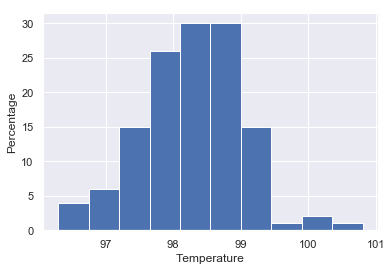

In [48]:
sns.set()
plt.hist(temperature)
plt.xlabel("Temperature")
plt.ylabel("Percentage")
plt.show()

<p>The data seems to be normally distributed, with loc between 98-99, and scale around 2.<br>
Let's see if there's a difference between gender.</p>

In [49]:
temp_f=data[data["gender"]=="F"].temperature
temp_m=data[data["gender"]=="M"].temperature

<p>The plot below shows the two histograms side by side</p>

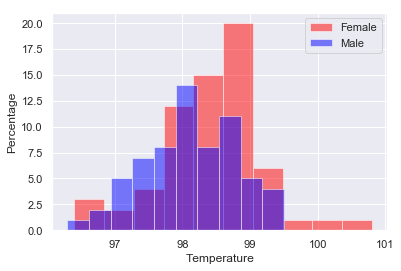

In [50]:
plt.hist(temp_f,color="red",alpha=0.5)
plt.hist(temp_m,color="blue",alpha=0.5)
plt.xlabel("Temperature")
plt.ylabel("Percentage")
plt.legend(("Female","Male"))
plt.show()

<p>It seems that they are the same, with men slightly lower.</p>
<h3>Cumulative Distribution Function of Temperature</h3>
<p>Now let's test if temperature actually follows a normal distribution. Let's start by 
calculating the expected value and variance.</p><br>
<p>The tools we're going to use to simulate a norml distribution is Pyro, a probabilistic programming language built by Uber, and PyTorch</p>

In [51]:
expect=np.sum(temperature)/len(temperature)
var=np.var(temperature)

In [52]:
dist=Normal(expect,var**0.5)

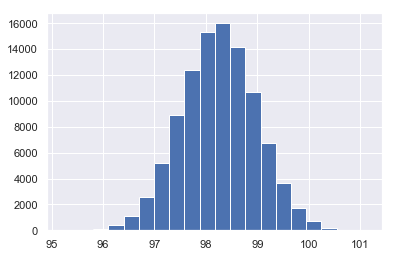

In [53]:
rand=[]
for _ in range(100000):
    rand.append(dist.sample().item())
plt.hist(rand,bins=20)
plt.show()

<p>Perfectly normal. Let's see how this aligns with our temperature data</p>

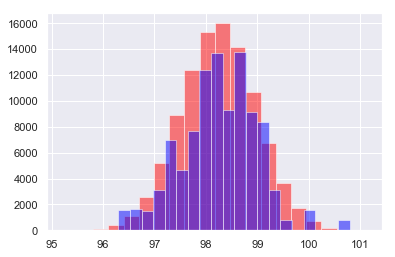

In [54]:
test=[]
for _ in range(100000):
    test.append(np.random.choice(temperature))
plt.hist(rand, bins=20, color="red", alpha=0.5)
plt.hist(test, bins=20, color="blue", alpha=0.5)
plt.show()

<p>Not quite as normal. Let's see if it follows a cumulative distribution function. Let's make a function.</p>

In [55]:
def cdf(colors=["blue"],*args):
    try:
        assert len(colors) == len(args)
    except AssertionError:
        print("Each function must specify a color.")
        return
    y=[]
    for arg in args:
        for i in arg:
            y.append(len(arg[np.where(arg < i)[0]])/len(arg))
        plt.plot(arg,y,color=colors[args.index(arg)],linestyle="none",alpha=0.5,marker=".")

<p>Looks normal enough. Let's overlay it with a known normal distribution.</p>

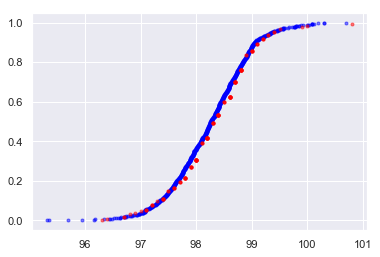

In [56]:
cdf(["blue"],np.array(rand)[:1000])
cdf(["red"],temperature)

<p>It looks very normal. Now let's test if there is a te</p>

In [68]:
np.corrcoef(data.temperature,data.heart_rate)[0,1]

0.25365640272076423

<p>A slight, but not very convincing correlation. It's fairly obvious when looking at the scatterplot</p>

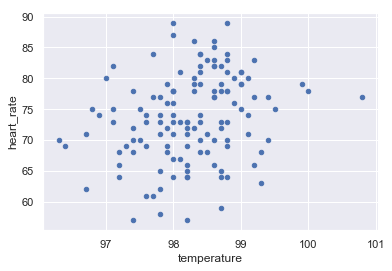

In [69]:
data.plot.scatter("temperature","heart_rate")